In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [82]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [85]:
df.ffill(axis=0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
df.drop(['Loan_ID'],axis=1,inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [96]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)

In [103]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [108]:
pred = knn.predict(X_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [110]:
knn.score(y_test,pred)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [112]:
print(confusion_matrix(y_test,pred))

[[14 21]
 [26 62]]


In [113]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    accuracy_rate.append(score.mean())

In [114]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['Loan_Status'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

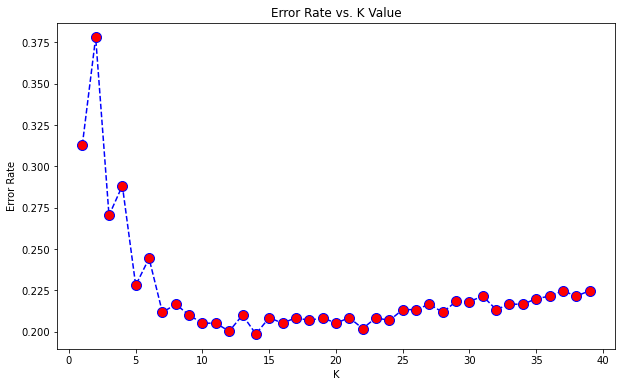

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')

WITH K=1


[[16 16]
 [22 69]]




In [116]:

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')


WITH K=6


[[ 9 26]
 [19 69]]




In [117]:
knn.score(X_test,y_test)

0.6341463414634146

In [118]:
from sklearn.svm import SVC
model = SVC()

In [119]:
model.fit(X_train, y_train)

SVC()

In [120]:
model.score(X_test, y_test)

0.7154471544715447

In [121]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [122]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [124]:
model.score(x_test,y_test)

0.6260162601626016

In [67]:
df=pd.read_csv('train_AV3 tec.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
df.bfill(axis = 0,inplace=True) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']],df['Loan_Status'],train_size=0.9,random_state=1)

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [73]:
model.fit(X_train, y_train)

C:\Users\BATTULA TULASI RAO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [74]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0


In [75]:
y_predicted = model.predict(X_test)

In [76]:
model.predict([[0,1,0,1,0,1,389,4,25,7,0,2]])

array([0])

In [77]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
533,533,1,0,1,0,0,464,0,138,8,1,1
544,544,0,1,0,1,0,143,9,55,8,1,1
41,41,1,0,0,0,0,17,35,12,8,1,2
148,148,0,0,0,0,0,454,77,150,8,1,0
111,111,0,1,0,0,0,129,157,92,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,1,0,0,1,0,65,55,55,9,0,2
172,172,1,1,3,1,0,209,0,37,5,1,0
34,34,1,0,3,0,0,469,198,182,8,1,0
49,49,0,0,0,0,0,268,152,97,8,1,1


In [78]:
model.predict_proba(X_test)

array([[0.29700069, 0.70299931],
       [0.23333645, 0.76666355],
       [0.21633935, 0.78366065],
       [0.31578626, 0.68421374],
       [0.16985839, 0.83014161],
       [0.89097068, 0.10902932],
       [0.15237595, 0.84762405],
       [0.31225161, 0.68774839],
       [0.37026499, 0.62973501],
       [0.82575426, 0.17424574],
       [0.13033929, 0.86966071],
       [0.1783008 , 0.8216992 ],
       [0.20827554, 0.79172446],
       [0.23666137, 0.76333863],
       [0.22442027, 0.77557973],
       [0.24550006, 0.75449994],
       [0.10944377, 0.89055623],
       [0.21637137, 0.78362863],
       [0.18127065, 0.81872935],
       [0.25352559, 0.74647441],
       [0.22157562, 0.77842438],
       [0.19081219, 0.80918781],
       [0.27930897, 0.72069103],
       [0.18571213, 0.81428787],
       [0.1794064 , 0.8205936 ],
       [0.39381555, 0.60618445],
       [0.42028848, 0.57971152],
       [0.8619272 , 0.1380728 ],
       [0.17268687, 0.82731313],
       [0.30756337, 0.69243663],
       [0.

In [79]:
model.score(X_test,y_test)

0.7580645161290323

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df1=df.apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Loan_Status',axis=1))
scaled_features = scaler.transform(df1.drop('Loan_Status',axis=1))
scaled_features
df1= pd.DataFrame(scaled_features,columns=df.columns[:-1])
df1

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df1.drop('Loan_Status',axis=1))

In [ ]:
scaled_features = scaler.transform(df1.drop('Loan_Status',axis=1))
scaled_features